In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src.read_data import *

# Load and Check Data

In [2]:
# load the data using custom read-function
df_iris = read_file(folder="raw", filename="iris_train.csv", delimiter=",")

In [3]:
# get information about the dataset
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  120 non-null    float64
 1   sepal_width   120 non-null    float64
 2   petal_length  120 non-null    float64
 3   petal_width   120 non-null    float64
 4   species       120 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.8+ KB


In [4]:
# check for null-values
df_iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
# check datatypes
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

# Analyse Data

## 1. Scatterplot

From the below scatterplots it can be seen that using only the sepal dimensions (length and width) in two dimensional space, a differentiation between the species can not be precisely done. The species versicolor and virginica overlap. Looking and the petal dimensions, a better differentiation can be made regarding the three species, the observations do not overlap as strong as in the sepal dimensions. However, for an algorithm such a KNN we will pass in all variables but are obviously unable to plot four dimensions.

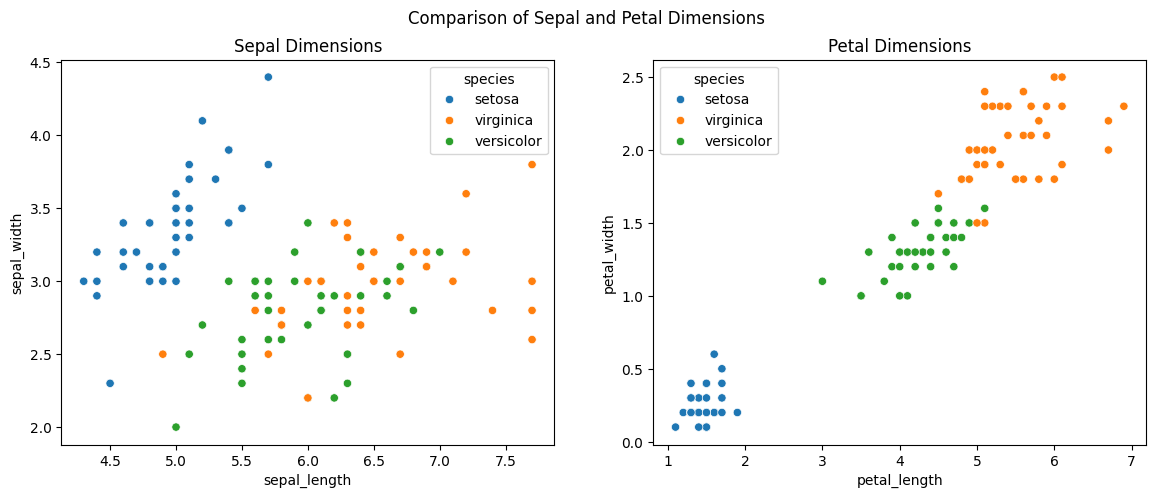

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# scatterplot with sepal length and width
sns.scatterplot(x=df_iris['sepal_length'], y=df_iris['sepal_width'], hue=df_iris['species'], ax=axes[0])
axes[0].set_title('Sepal Dimensions')
# scatterplot with petal length and width
sns.scatterplot(x=df_iris['petal_length'], y=df_iris['petal_width'], hue=df_iris['species'], ax=axes[1])
axes[1].set_title('Petal Dimensions')
plt.suptitle('Comparison of Sepal and Petal Dimensions')
plt.show()

## 2. Pairplot

The pairplot allows to see the distribution for each category and predictor variable. It can be seen that distribution of the species are deviating from each other, especially for sepal-length, petal-length and petal-width. Not so much for sepal-width. The species setosa seems to have high values for both petal-length and petal-width, so we can assume that as soon as observations would be available, whenever they would present high values in both variables chances are high these new observations would be classified as setosa. 

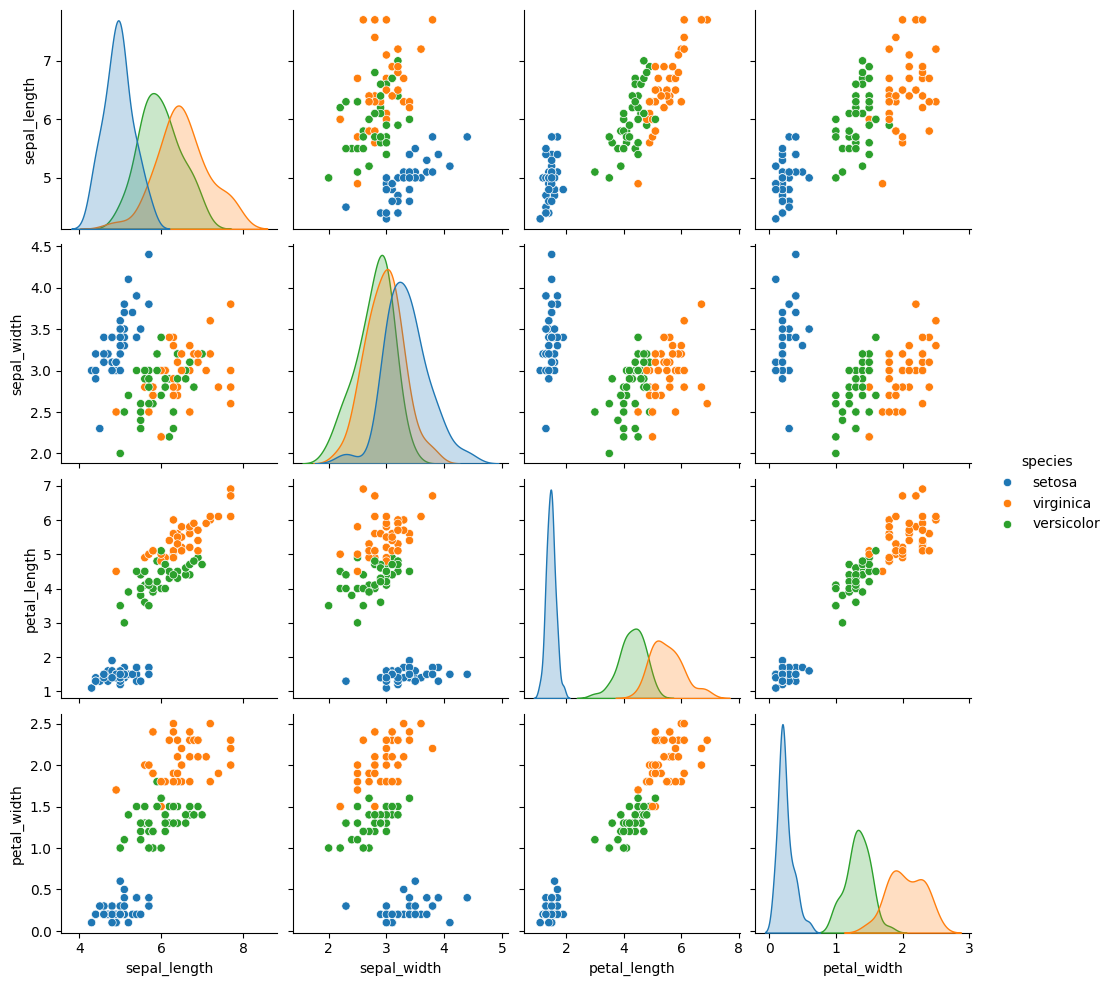

In [7]:
# create pairplot
sns.pairplot(df_iris, hue='species')
plt.show()

# Test

In [10]:
df_train = read_file(folder="raw", filename="iris_train.csv", delimiter=",")
df_test = read_file(folder="raw", filename="iris_test.csv", delimiter=",")

In [11]:
from typing import Tuple
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

def data_preprocessing(data: pd.DataFrame) -> Tuple[np.ndarray, np.ndarray]:
    
    # Create a copy of the data
    data_copy = data.copy()

    # Create predictor and target columns
    data_predictors = data_copy.drop('species', axis=1)
    data_target = data_copy['species']

    # Get numerical columns dynamically
    numerical_columns_predictor = data_predictors.columns

    # Pipeline for numerical features
    num_pipeline_predictor = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scale', StandardScaler())
    ])

    # Pipeline for target variable (one-hot encoding)
    target_pipeline = Pipeline(steps=[
        ('onehot', OneHotEncoder())
    ])

    # Create column transformer for predictor variables
    col_trans_predictor = ColumnTransformer(transformers=[
        ('num_pipeline_predictor', num_pipeline_predictor, numerical_columns_predictor)
    ],
        remainder='passthrough',
        n_jobs=-1
    )

    # Create column transformer for target variable
    col_trans_target = ColumnTransformer(transformers=[
        ('target_pipeline', target_pipeline, ['species'])
    ],
        remainder='drop',  # Drop other columns not specified in transformers
        n_jobs=-1
    )

    # Fit and transform the data for predictor variables
    transformed_data_predictor = col_trans_predictor.fit_transform(data_predictors)

    # Get the column names after transformation for predictor variables
    transformed_column_names_predictor = col_trans_predictor.named_transformers_['num_pipeline_predictor'].named_steps['scale'].get_feature_names_out(numerical_columns_predictor)

    # Fit and transform the data for the target variable
    transformed_data_target = col_trans_target.fit_transform(data_target.to_frame())  # Need to pass target as a DataFrame

    # Get the column names after transformation for the target variable
    transformed_column_names_target = col_trans_target.named_transformers_['target_pipeline'].named_steps['onehot'].get_feature_names_out(['species'])

    return transformed_data_predictor, transformed_column_names_predictor, transformed_data_target, transformed_column_names_target


In [12]:
# Create train variables
X_train, columnnames_X_train, y_train, columnnames_y_train = data_preprocessing(df_train)

In [ ]:
# Create train variables
X_test, columnnames_X_test, y_test, columnnames_y_train = data_preprocessing(df_test)